In [1]:
from SkewNet.model.rotated_images_dataset import RotatedImageDataset

import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms

import torchvision.transforms.functional as TF
import numpy as np

import math

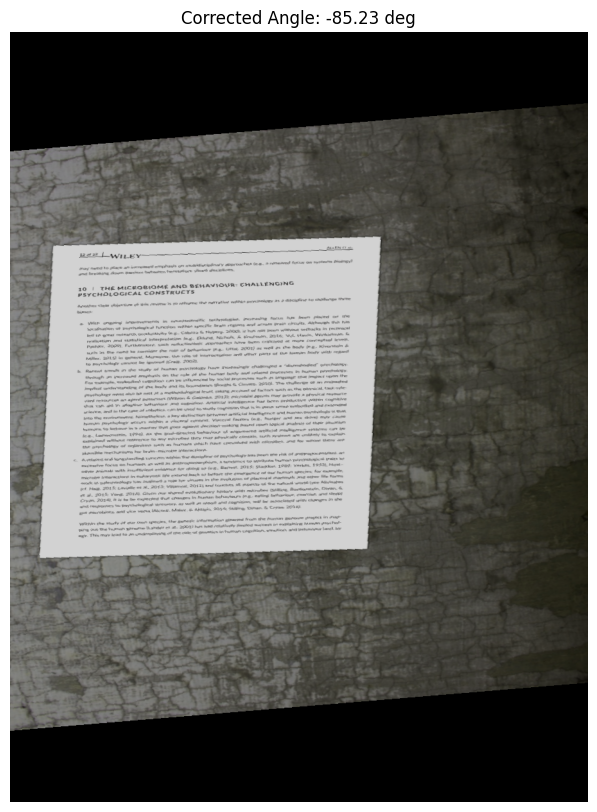

In [7]:
# Create an instance of the dataset
# Make sure to replace these paths with the actual paths to your files
img_dir = "/scratch/gpfs/RUSTOW/deskewing_datasets/images/synthetic_data"
annotations_file = "/scratch/gpfs/RUSTOW/deskewing_datasets/synthetic_image_angles.csv"

image_transform = transforms.Compose([
            transforms.Resize((1200, 900), antialias=False),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        ])

# Create dataset instance
dataset = RotatedImageDataset(annotations_file, img_dir, subset="train", transform=image_transform)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Function to visualize images
def show_images(images, labels):
    fig, axs = plt.subplots(1, len(images), figsize=(15,10))
    for i, (img, label) in enumerate(zip(images, labels)):
        # Convert the label from radians to degrees and rotate the image
        rads = -label.item() 
        angle = rads * (180/np.pi)
        img = TF.to_pil_image(img)  # Convert the tensor to PIL Image to apply rotation
        img = TF.rotate(img, angle)
            
        if (len(images) > 1):
            axs[i].imshow(img)
            axs[i].set_title(f"Corrected Angle: {angle:.2f} deg")
            axs[i].axis('off')
        else:
            axs.imshow(img)
            axs.set_title(f"Corrected Angle: {angle:.2f} deg")
            axs.axis('off')
            
    plt.show()

# Visualize some images from the DataLoader
for images, labels in data_loader:
    show_images(images, labels)
    break  # Show one batch only